In [16]:
import lightgbm

print(lightgbm.__version__)

4.3.0


> - 기존의 gradient boosting 모델에 비해 훨씬 빠르고 메모리 효율적이며, 뛰어난 성능을 보여
> - Gradient Boosting 기반: LightGBM은 gradient boosting 알고리즘을 기반으로 합니다. 이는 약한 학습기(weak learner)들을 순차적으로 결합하여 강력한 모델을 만드는 방식입니다. 각 약한 학습기는 이전 학습기의 오차를 보완하는 방향으로 학습됩니다.
> - Leaf-wise 트리 성장 알고리즘: LightGBM은 기존의 level-wise 트리 성장 방식과 달리 leaf-wise 방식을 사용합니다. 이 방식은 가장 큰 감소량을 보이는 리프 노드를 선택적으로 확장하여, 보다 효율적으로 트리를 구축할 수 있습니다.
> - Histogram 기반 알고리즘: LightGBM은 데이터를 메모리에 로드하지 않고도 효과적으로 분할 기준을 찾을 수 있는 histogram 기반 알고리즘을 사용합니다. 이를 통해 메모리 사용량을 크게 줄일 수 있습니다.
> - Exclusive Feature Bundling (EFB): LightGBM은 서로 상관관계가 낮은 기능들을 번들로 묶어 처리함으로써 학습 속도를 높입니다. 이는 특히 희소 데이터셋에서 효과적입니다.
> - Parallel Learning 지원: LightGBM은 CPU 및 GPU 병렬 처리를 지원하여 학습 속도를 크게 향상시킬 수 있습니다.
> - 조기 중단(Early Stopping) 지원: LightGBM은 검증 데이터 성능이 더 이상 향상되지 않으면 자동으로 학습을 중단하는 기능을 제공합
> - 다양한 손실 함수 지원: LightGBM은 회귀, 분류, 순위 등 다양한 문제에 적용할 수 있는 다양한 손실 함수를 제공합니다.
>
> - 빠른 학습 속도
메모리 효율성
빠른 학습 뛰어난 예측 성능
다양한 문제 해결 가능
카테고리형 피처의 자동 변환과 최적 분할(원-핫 인코딩 등을 사용하지 않고도 카테고리형 피처를 최적으로 변환하고 노드 분할)

> - 큰 데이터셋, 희소 데이터셋, 다양한 유형의 문제에서 매우 유용하게 사용될 수 있는 강력한 머신러닝 알고리즘

In [17]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve

def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    
    accuracy = accuracy_score(y_test , pred)
    
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    
    f1 = f1_score(y_test,pred)
    
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred_proba)
    
    print('오차 행렬')
    print(confusion)
    
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

def precision_recall_curve_plot(y_test=None, pred_proba_c1=None):
    
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출. 
    precisions, recalls, thresholds = precision_recall_curve( y_test, pred_proba_c1)
    
    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행. 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    # threshold 값 X 축의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    # x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

train_df = pd.read_csv('./titanic/titanic_train.csv')
predict_df = pd.read_csv('./titanic/test.csv')
gender_submission_df = pd.read_csv('./titanic/gender_submission.csv')

# 알파벳 뒤에 붙는 숫자 값은 무시하고 Alphabet만 가져오는 전략을 선택
train_df['Cabin'] = train_df['Cabin'].str[:1]

def get_category_age(age):
    cat = ''
    if age <= -1: cat = 0
    elif age <= 5: cat = 1
    elif age <= 12: cat = 2
    elif age <= 18: cat = 3
    elif age <= 25: cat = 4
    elif age <= 35: cat = 5
    elif age <= 60: cat = 6
    else: cat = 7
               
    return cat

group_names = [0, 1, 2, 3, 4, 5, 6, 7]
train_df['Age_range'] = train_df['Age'].apply(lambda x : get_category_age(x))

def get_category_fare(fare):
    cat = ''
    if fare <= 0: cat = 0
    elif fare <= 10: cat = 1
    elif fare <= 20: cat = 2
    elif fare <= 30: cat = 3
    elif fare <= 40: cat = 4
    elif fare <= 50: cat = 5
    elif fare <= 60: cat = 6
    else: cat = 7
               
    return cat

group_names = [0, 1, 2, 3, 4, 5, 6, 7]
train_df['Fare_range'] = train_df['Fare'].apply(lambda x : get_category_fare(x))

# 불필요한 특성, null 값 제거
def drop_features(df):
    df.drop(['PassengerId','Name','Ticket', 'Age', 'Fare'], axis=1, inplace=True)

    y = df['Survived']
    df = df.drop('Survived', axis=1, inplace=False)
    return df, y

def fillna(df):
    df['Cabin'] = df['Cabin'].fillna('N')
    df['Embarked'] = df['Embarked'].fillna('N')
    return df
# predict_df에서 사용
def drop_features_update(df):
    df.drop(['PassengerId','Name','Ticket', 'Age', 'Fare'], axis=1, inplace=True)
    return df

train_df = fillna(train_df)
X, y = drop_features(train_df)


# 라벨 인코딩 구현
# Sex
def get_category_sex(sex):
    cat = ''
    if sex == "male": cat = 0
    else: cat = 1
    return cat

group_names = [0, 1]
X['Sex'] = X['Sex'].apply(lambda x : get_category_sex(x))

# Embarked
def get_category_embarked(embarked):
    cat = ''
    if embarked == "S": cat = 0
    elif embarked == "C": cat= 1
    elif embarked == "Q": cat= 2
    else: cat = 3
    return cat

group_names = [0, 1, 2, 3]
X['Embarked'] = X['Embarked'].apply(lambda x : get_category_embarked(x))

# Cabin
def get_category_cabin(cabin):
    cat = ''
    if cabin == "A": cat = 0
    elif cabin == "B": cat= 1
    elif cabin == "C": cat= 2
    elif cabin == "D": cat= 3
    elif cabin == "E": cat= 4
    elif cabin == "F": cat= 5
    elif cabin == "G": cat= 6
    elif cabin == "N": cat= 7
    else: cat = 8
    return cat

group_names = [0, 1, 2, 3, 4, 5, 6, 7, 8]
X['Cabin'] = X['Cabin'].apply(lambda x : get_category_cabin(x))

print(X.head())

from sklearn.preprocessing import StandardScaler

# # 표준화 => 2차원 데이터
# sc = StandardScaler()
# X = sc.fit_transform(X)
# X[1]

   Pclass  Sex  SibSp  Parch  Cabin  Embarked  Age_range  Fare_range
0       3    0      1      0      7         0          4           1
1       1    1      1      0      2         1          6           7
2       3    1      0      0      7         0          5           1
3       1    1      1      0      2         0          5           6
4       3    0      0      0      7         0          5           1


In [19]:
predict_df['Age_range'] = predict_df['Age'].apply(lambda x : get_category_age(x))

predict_df['Fare_range'] = predict_df['Fare'].apply(lambda x : get_category_fare(x))

predict_df = fillna(predict_df)
predict_df = drop_features_update(predict_df)

predict_df['Sex'] = predict_df['Sex'].apply(lambda x : get_category_sex(x))
predict_df['Embarked'] = predict_df['Embarked'].apply(lambda x : get_category_embarked(x))

predict_df['Cabin'] = predict_df['Cabin'].str[:1]
predict_df['Cabin'] = predict_df['Cabin'].apply(lambda x : get_category_cabin(x))

print(predict_df.head(3))

# predict_df = sc.transform(predict_df)
# predict_df[1]

   Pclass  Sex  SibSp  Parch  Cabin  Embarked  Age_range  Fare_range
0       3    0      0      0      7         2          5           1
1       3    1      1      0      7         0          6           1
2       2    0      0      0      7         2          7           1


In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# 위에서 만든 X_train, y_train을 다시 쪼개서 90%는 학습과 10%는 검증용 데이터로 분리 
X_tr, X_val, y_tr, y_val= train_test_split(X_train, y_train, test_size=0.1, random_state=156 )

In [21]:
from lightgbm import early_stopping
from lightgbm import LGBMClassifier

In [9]:
lgbm_wrapper = LGBMClassifier(n_estimators=400, learning_rate=0.05)

evals = [(X_tr, y_tr), (X_val, y_val)]
lgbm_wrapper.fit(X_tr, y_tr, callbacks=[early_stopping(stopping_rounds=50)], eval_metric="logloss", eval_set=evals)

preds = lgbm_wrapper.predict(X_test)
pred_proba = lgbm_wrapper.predict_proba(X_test)[:, 1]

[LightGBM] [Info] Number of positive: 260, number of negative: 380
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001496 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 48
[LightGBM] [Info] Number of data points in the train set: 640, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.406250 -> initscore=-0.379490
[LightGBM] [Info] Start training from score -0.379490
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 50 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [War

In [10]:
get_clf_eval(y_test, preds, pred_proba)

오차 행렬
[[100  10]
 [ 20  49]]
정확도: 0.8324, 정밀도: 0.8305, 재현율: 0.7101,    F1: 0.7656, AUC:0.8946


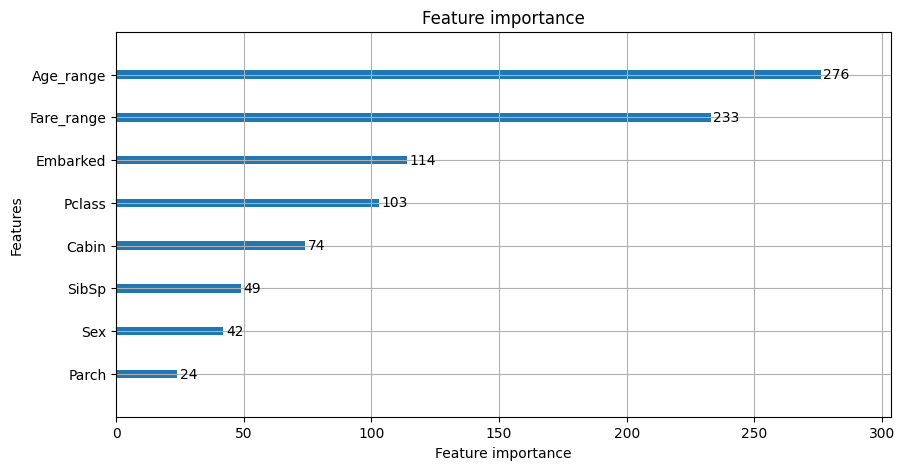

In [12]:
from lightgbm import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 5))
plot_importance(lgbm_wrapper, ax=ax)
plt.show()

In [13]:
predict_titanic_pred_lgbm = lgbm_wrapper.predict(predict_df)
preds_lgbm = [ 1 if x > 0.5 else 0 for x in predict_titanic_pred_lgbm]
print(f"predict_titanic 예측: {predict_titanic_pred_lgbm[:10]}")
print('예측값 10개만 표시:',preds_lgbm[:10], "\n")

gender_submission_df['Survived'] = preds_lgbm
gender_submission_df.to_csv('titanic_submission_lgbm.csv',index=False)
gender_submission_df

predict_titanic_Voting 예측: [0 0 0 0 0 0 1 0 1 0]
예측값 10개만 표시: [0, 0, 0, 0, 0, 0, 1, 0, 1, 0] 



,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


## Hyperopt

In [28]:
from lightgbm import LGBMClassifier
from lightgbm import early_stopping

lgbm_clf = LGBMClassifier(n_estimators=500)

eval_set=[(X_tr, y_tr), (X_val, y_val)]
lgbm_clf.fit(X_tr, y_tr, callbacks=[early_stopping(stopping_rounds=100)], eval_metric="logloss", eval_set=eval_set)

lgbm_pred = lgbm_clf.predict(X_test)
lgbm_proba = lgbm_clf.predict_proba(X_test)[:,1]

lgbm_f1_score = f1_score(y_test, lgbm_pred)
lgbm_roc_score = roc_auc_score(y_test, lgbm_proba)

print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))
print('F1 Score: {0:.4f}'.format(lgbm_f1_score),"\n")
get_clf_eval(y_test , lgbm_pred, lgbm_pred)

[LightGBM] [Info] Number of positive: 260, number of negative: 380
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002955 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 48
[LightGBM] [Info] Number of data points in the train set: 640, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.406250 -> initscore=-0.379490
[LightGBM] [Info] Start training from score -0.379490
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 100 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Wa

In [32]:
predict_titanic_pred_lgbm_test = lgbm_clf.predict(predict_df)
print(f"predict_titanic 예측: {predict_titanic_pred_lgbm_test[:10]}")

gender_submission_df['Survived'] = predict_titanic_pred_lgbm_test
gender_submission_df.to_csv('titanic_submission_lgbm_test.csv',index=False)
gender_submission_df

predict_titanic 예측: [0 0 0 0 0 0 1 0 1 0]


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [34]:
from hyperopt import hp

lgbm_search_space = {'num_leaves': hp.quniform('num_leaves', 2, 64, 1),
                     # 트리의 최대 리프 노드 수, 값이 크면 모델의 복잡도가 높아져 과적합
                     
                     'max_depth': hp.quniform('max_depth', 2, 160, 1),
                     # lgb는 트리의 깊이를 크게 상관하지 않는다. -> num_leaves로 과적합 제한
                     
                     'min_child_samples': hp.quniform('min_child_samples', 60, 100, 1),
                     # 리프 노드를 분할하기 위한 최소 샘플 수, 크면 과적합을 방지할 수 있지만, 모델의 복잡도가 낮아질 수 있다.
                     
                     'subsample': hp.uniform('subsample', 0.7, 1),
                     # 각 트리 학습 시 사용되는 데이터 샘플의 비율
                     
                     'learning_rate': hp.uniform('learning_rate', 0.01, 0.2)
                    }

In [ ]:
def objective_func(search_space):
    lgbm_clf =  LGBMClassifier(n_estimators=100, num_leaves=int(search_space['num_leaves']),
                               max_depth=int(search_space['max_depth']),
                               min_child_samples=int(search_space['min_child_samples']), 
                               subsample=search_space['subsample'],
                               learning_rate=search_space['learning_rate'])
    # 3개 k-fold 방식으로 평가된 roc_auc 지표를 담는 list
    roc_auc_list = []
    
    # 3개 k-fold방식 적용 
    kf = KFold(n_splits=3)
    # X_train을 다시 학습과 검증용 데이터로 분리
    for tr_index, val_index in kf.split(X_train):
        # kf.split(X_train)으로 추출된 학습과 검증 index값으로 학습과 검증 데이터 세트 분리 
        X_tr, y_tr = X_train.iloc[tr_index], y_train.iloc[tr_index]
        X_val, y_val = X_train.iloc[val_index], y_train.iloc[val_index]

        # early stopping은 30회로 설정하고 추출된 학습과 검증 데이터로 XGBClassifier 학습 수행. 
        lgbm_clf.fit(X_tr, y_tr, callbacks=[early_stopping(stopping_rounds=30)], eval_metric="auc",
           eval_set=[(X_tr, y_tr), (X_val, y_val)])

        # 1로 예측한 확률값 추출후 roc auc 계산하고 평균 roc auc 계산을 위해 list에 결과값 담음.
        score = roc_auc_score(y_val, lgbm_clf.predict_proba(X_val)[:, 1]) 
        roc_auc_list.append(score)
    
    # 3개 k-fold로 계산된 roc_auc값의 평균값을 반환하되, 
    # HyperOpt는 목적함수의 최소값을 위한 입력값을 찾으므로 -1을 곱한 뒤 반환.
    return -1*np.mean(roc_auc_list)

In [ ]:
from hyperopt import fmin, tpe, Trials

trials = Trials()

# fmin()함수를 호출. max_evals지정된 횟수만큼 반복 후 목적함수의 최소값을 가지는 최적 입력값 추출. 
best = fmin(fn=objective_func, space=lgbm_search_space, algo=tpe.suggest,
            max_evals=50, # 최대 반복 횟수를 지정합니다.
            trials=trials, rstate=np.random.default_rng(seed=30))

print('best:', best)

In [ ]:
lgbm_clf =  LGBMClassifier(n_estimators=500, num_leaves=int(best['num_leaves']),
                           max_depth=int(best['max_depth']),
                           min_child_samples=int(best['min_child_samples']), 
                           subsample=round(best['subsample'], 5),
                           learning_rate=round(best['learning_rate'], 5)
                          )

# evaluation metric을 auc로, early stopping은 100 으로 설정하고 학습 수행. 
lgbm_clf.fit(X_tr, y_tr, callbacks=[early_stopping(stopping_rounds=100)], 
            eval_metric="auc",eval_set=[(X_tr, y_tr), (X_val, y_val)])

lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:,1])
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))